# Use Random Forest to prepare a model on fraud data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.ensemble import RandomForestClassifier as rf

In [2]:
df=pd.read_csv('Fraud_check.csv')

In [3]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
df1=df.copy()

In [5]:
df1.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [6]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Taxable.Income,600.0,55208.375000,26204.827597,10003.0,32871.50,55074.5,78611.75,99619.0
City.Population,600.0,108747.368333,49850.075134,25779.0,66966.75,106493.5,150114.25,199778.0
Work.Experience,600.0,15.558333,8.842147,0.0,8.00,15.0,24.00,30.0


In [7]:
df1.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [8]:
df1.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

C:\Users\bhale\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Taxable.Income'>

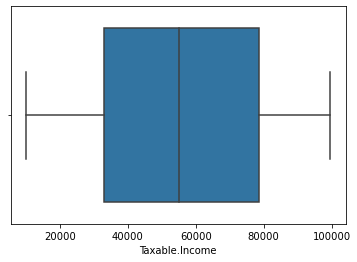

In [9]:
sns.boxplot(df1['Taxable.Income'])

C:\Users\bhale\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='City.Population'>

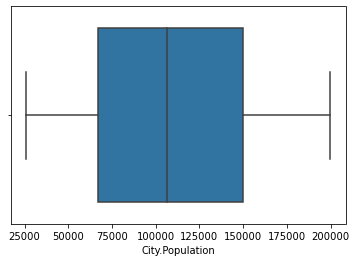

In [10]:
sns.boxplot(df1['City.Population'])

C:\Users\bhale\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Work.Experience'>

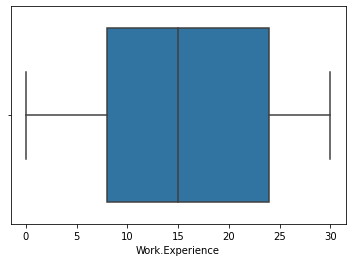

In [11]:
sns.boxplot(df1['Work.Experience'])

# There are no outliers in the data

In [12]:
plt.rcParams["figure.figsize"] = 9,5

([<matplotlib.axis.XTick at 0x20e1a3068e0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

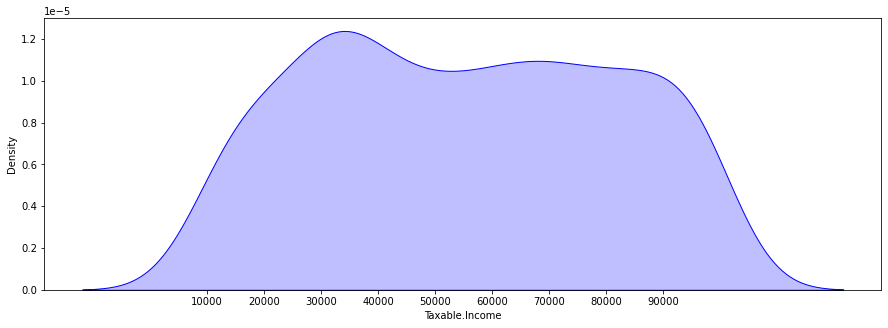

In [15]:
plt.figure(figsize=(15,5))
sns.kdeplot(df1['Taxable.Income'],shade=True,color='b')
plt.xticks([i for i in range(10000,100000,10000)])

In [16]:
skew=df1['Taxable.Income'].skew()
kurt=df1['Taxable.Income'].kurtosis()
print('Skewness=',skew)
print('Kurtosis=',kurt)

Skewness= 0.030014788906377175
Kurtosis= -1.1997824607083138


# The data is skewed on the right 
# The data has negative Kurtosis

In [17]:
obj_colum = df1.select_dtypes(include='object').columns.tolist()

In [18]:
obj_colum

['Undergrad', 'Marital.Status', 'Urban']

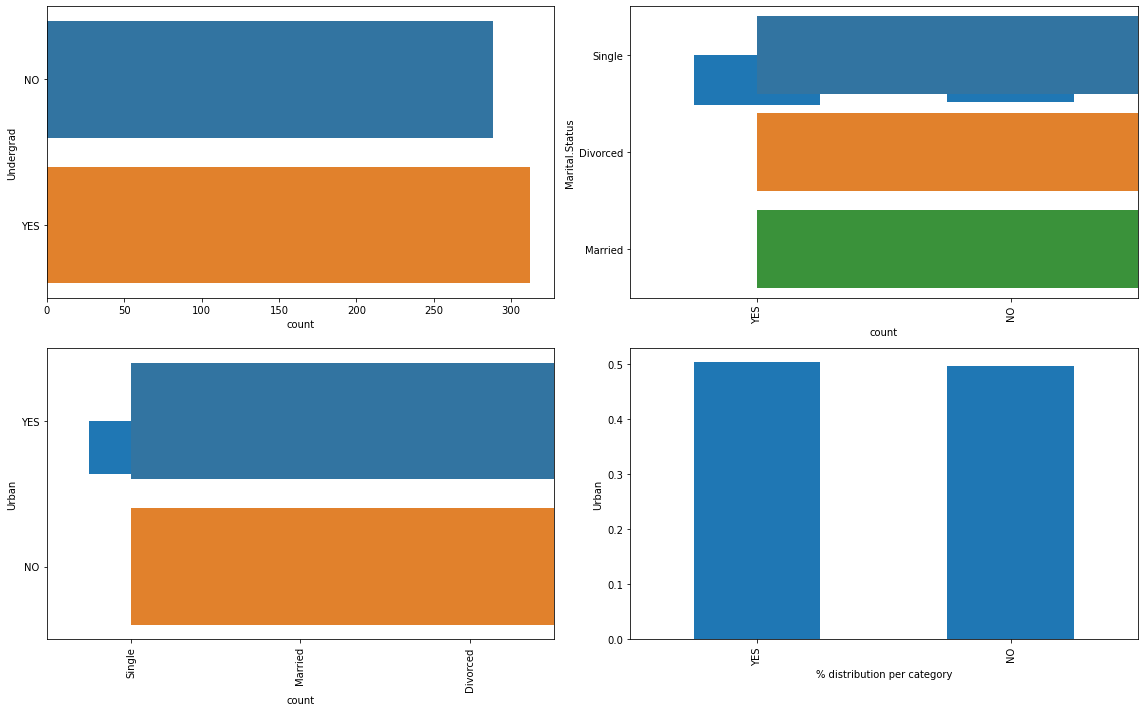

In [19]:
plt.figure(figsize=(16,10))
for i,col in enumerate(obj_colum,1):
    plt.subplot(2,2,i)
    sns.countplot(data=df1,y=col)
    plt.subplot(2,2,i+1)
    df1[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()  

In [20]:
num_columns = df1.select_dtypes(exclude='object').columns.tolist()

In [21]:
num_columns

['Taxable.Income', 'City.Population', 'Work.Experience']

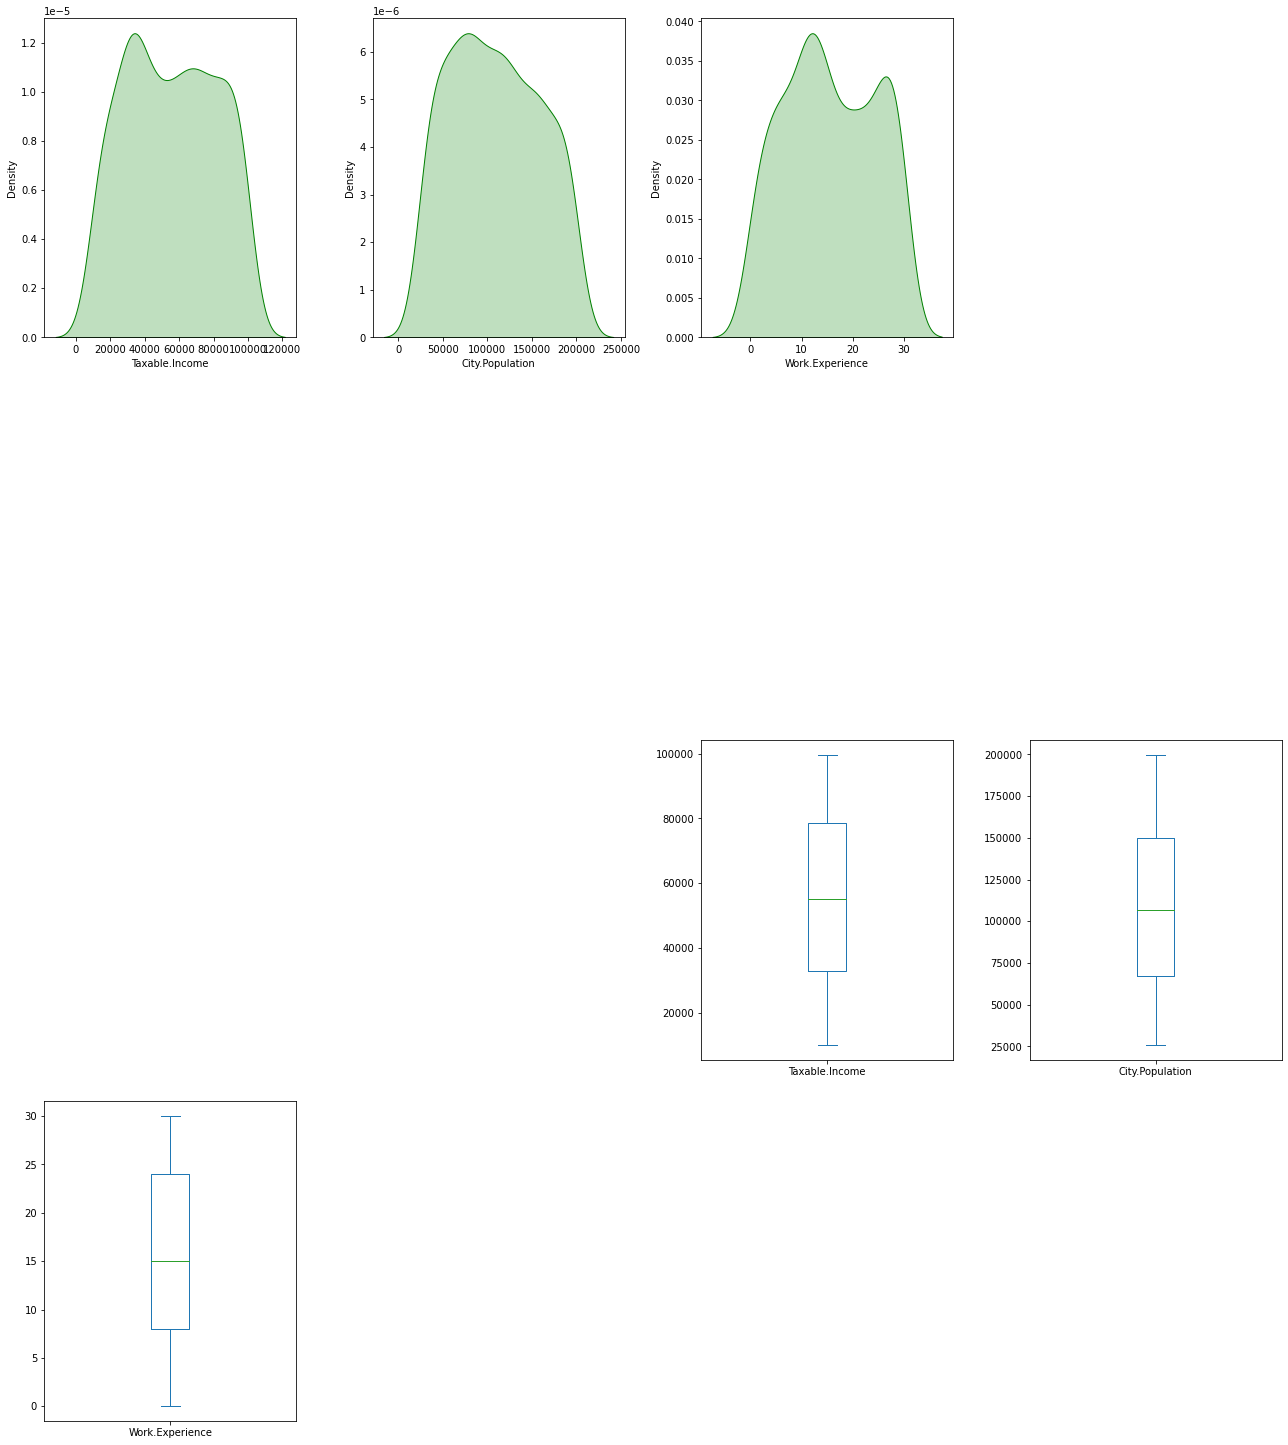

,Taxable.Income,City.Population,Work.Experience
skewness,0.030015,0.125009,0.018529
kurtosis,-1.199782,-1.120154,-1.167524


In [22]:
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(df[col],color='g',shade=True)
    plt.subplot(8,4,i+10)
    df[col].plot.box()
plt.tight_layout() 
plt.show()
num_data = df[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

In [23]:
df1 = pd.get_dummies(df1, columns = ['Undergrad','Marital.Status','Urban'])

In [24]:
corel=df1.corr()

In [25]:
corel

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
Taxable.Income,1.000000,-0.064387,-0.001818,0.049232,-0.049232,0.062099,-0.100611,0.037910,-0.070628,0.070628
City.Population,-0.064387,1.000000,0.013135,-0.079579,0.079579,0.004925,-0.007035,0.002087,0.040098,-0.040098
Work.Experience,-0.001818,0.013135,1.000000,0.005362,-0.005362,-0.014833,0.033347,-0.018123,0.094559,-0.094559
Undergrad_NO,0.049232,-0.079579,0.005362,1.000000,-1.000000,0.045101,-0.015120,-0.028883,-0.000267,0.000267
Undergrad_YES,-0.049232,0.079579,-0.005362,-1.000000,1.000000,-0.045101,0.015120,0.028883,0.000267,-0.000267
Marital.Status_Divorced,0.062099,0.004925,-0.014833,0.045101,-0.045101,1.000000,-0.468757,-0.510435,0.065518,-0.065518
Marital.Status_Married,-0.100611,-0.007035,0.033347,-0.015120,0.015120,-0.468757,1.000000,-0.520317,-0.016771,0.016771
Marital.Status_Single,0.037910,0.002087,-0.018123,-0.028883,0.028883,-0.510435,-0.520317,1.000000,-0.047014,0.047014
Urban_NO,-0.070628,0.040098,0.094559,-0.000267,0.000267,0.065518,-0.016771,-0.047014,1.000000,-1.000000
Urban_YES,0.070628,-0.040098,-0.094559,0.000267,-0.000267,-0.065518,0.016771,0.047014,-1.000000,1.000000


<AxesSubplot:>

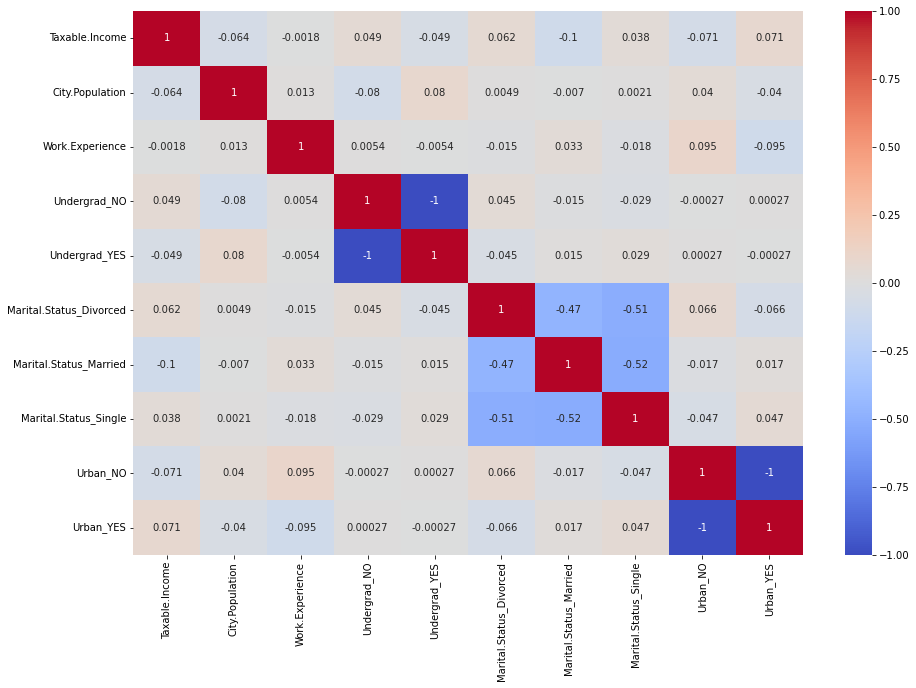

In [28]:
plt.figure(figsize=(15,10))
sns.heatmap(annot=True,
           data=corel,
           vmin=-1,
           vmax=1,
           cmap='coolwarm')

## Since the target variable is continious, we create a class of taxable_income <= 30000 as "Risky" and others are "Good

In [29]:
df1['Taxable.Income']=pd.cut(df1['Taxable.Income'],bins=[0,30000,100000],labels=['risky','good'])

In [33]:
X = df1.iloc[:,1:10]
y = df1.iloc[:,0]

In [36]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=101)

In [37]:
y_train.value_counts()

good     381
risky     99
Name: Taxable.Income, dtype: int64

In [39]:
model =rf(n_jobs=4,n_estimators = 150, oob_score =True,criterion ='entropy') 
model.fit(x_train,y_train)
model.oob_score_

0.74375

In [40]:
pred_train=model.predict(x_train)

In [41]:
accuracy_score(y_train,pred_train)

1.0

In [42]:
confusion_matrix(y_train,pred_train)

array([[381,   0],
       [  0,  99]], dtype=int64)

In [43]:
pred_test=model.predict(x_test)

In [44]:
accuracy_score(y_test,pred_test)

0.7333333333333333

In [45]:
confusion_matrix(y_test,pred_test)

array([[87,  8],
       [24,  1]], dtype=int64)

## As seen in the confusion matrix of test data 88 instances are predicted correctly and 32 instances are predicted wrongly.

In [46]:
df_t=pd.DataFrame({'Actual':y_test, 'Predicted':pred_test})

In [47]:
df_t

,Actual,Predicted
240,good,good
304,good,good
411,good,good
336,good,good
271,good,good
...,...,...
282,good,good
31,good,good
318,good,good
527,good,good


In [48]:
from sklearn.tree import DecisionTreeClassifier

In [49]:
dt=DecisionTreeClassifier(criterion='entropy',random_state=0)

In [50]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [51]:
y_pred_dt=dt.predict(x_test)

In [52]:
from  sklearn.metrics import classification_report

In [53]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

        good       0.78      0.76      0.77        95
       risky       0.18      0.20      0.19        25

    accuracy                           0.64       120
   macro avg       0.48      0.48      0.48       120
weighted avg       0.66      0.64      0.65       120



In [54]:
print(classification_report(y_train,pred_train))

              precision    recall  f1-score   support

        good       1.00      1.00      1.00       381
       risky       1.00      1.00      1.00        99

    accuracy                           1.00       480
   macro avg       1.00      1.00      1.00       480
weighted avg       1.00      1.00      1.00       480



# Conclusion

## Since the accuracy of the training set is 100% , while the accuracy of the test set is 64%

In [55]:
model.feature_importances_

array([0.5192935 , 0.3578597 , 0.01667814, 0.01865172, 0.01710601,
       0.02017005, 0.01669423, 0.0181104 , 0.01543626])

In [56]:
fi= pd.DataFrame({'feature': list(x_train.columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)

In [57]:
fi

,feature,importance
0,City.Population,0.519293
1,Work.Experience,0.357860
5,Marital.Status_Married,0.020170
3,Undergrad_YES,0.018652
7,Urban_NO,0.018110
4,Marital.Status_Divorced,0.017106
6,Marital.Status_Single,0.016694
2,Undergrad_NO,0.016678
8,Urban_YES,0.015436


# As seen in the above table price is most important feature